### Random Forest

- Dataset 4 features: (optional) split => training & testing
- Bootstrapped data => dataset baru 1000 rows == 'out of bag' 
- Create decision tree, => hanya 2 features, gini // entropy => decision tree
- Create decision tree, => hanya 2 features, gini // entropy => decision tree
- Create decision tree, => hanya 2 features, gini // entropy => decision tree
- Create decision tree, => hanya 2 features, gini // entropy => decision tree
- Create decision tree, => hanya 2 features, gini // entropy => decision tree
- Create decision tree, => hanya 2 features, gini // entropy => decision tree
- Create decision tree, => hanya 3 features, gini // entropy => decision tree

10 decision tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve


In [2]:
data = load_iris()
df = pd.DataFrame(data['data'],columns=['SL','SW','PL','PW'])
# print(data['feature_names'])
# df.head()
df['target'] = data['target']

In [3]:
xtr,xts,ytr,yts = train_test_split(
    df[['SL','SW','PL','PW']],df['target'],test_size=.1)

In [4]:
model = RandomForestClassifier(n_estimators=10) #=> decision tree keluar sesuai estimator
model.fit(xtr,ytr)
# len(model.estimators_)
# model.estimators_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
#tree.plot_tree(model.estimators_[0])

for i in range(len(model.estimators_)):
    tree.export_graphviz(model.estimators_[i],out_file=f'rf{i}.dot',
                    feature_names=['SL','SW','PL','PW'],
                    class_names=['setosa','versicolor','virginica'],
                    rounded=True, filled=True)

In [6]:
# from subprocess import call
# call(['dot','-Tpng','rf0.dot','-o','rf0.png','Gdpi=520'])

In [7]:
model.predict([xts.iloc[1]])[0]

1

In [8]:
yts.loc[xts.iloc[1].name]

1

In [9]:
model.predict([[1,2,3,4]])[0]

2

In [10]:
#model.score(xts,yts)
model.feature_importances_

array([0.06471333, 0.0247902 , 0.44584049, 0.46465598])

In [11]:
# confusion matrix
cm = confusion_matrix(yts,model.predict(xts),labels=[0,1,2])
cm = pd.DataFrame(cm,columns=['Pred 0','Pred 1','Pred 2'],
                 index=['Actual 0','Actual 1','Actual 2'])
cm

,Pred 0,Pred 1,Pred 2
Actual 0,5,0,0
Actual 1,0,7,1
Actual 2,0,0,2


In [12]:
# Accuracy Score 
accuracy_score(yts,model.predict(xts))

0.9333333333333333

In [13]:
model.score(xts,yts)

0.9333333333333333

In [14]:
# ROC _Curve => x = fpr, y = tpr
# model.predict_proba(xts)[:,0] #probability = setosa 0
# model.predict_proba(xts)[:,1] #probability = versicolor 1
# model.predict_proba(xts)[:,2] #probability = virginica 2

fpr,tpr,thres= roc_curve(yts,model.predict_proba(xts)[:,0],
         pos_label=0)
fpr,tpr,thres


(array([0., 0., 1.]), array([0., 1., 1.]), array([2., 1., 0.]))

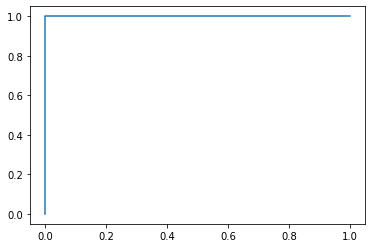

In [15]:
# Plotting
plt.plot(fpr,tpr)

In [16]:
# ROC_AUC Score
roc_auc_score(np.array(yts.tolist()),
             model.predict_proba(xts),
             labels = [0,1,2],
             multi_class = 'ovo')

1.0

In [17]:
model.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>

In [19]:
from sklearn.datasets import load_breast_cancer

In [20]:
data = load_breast_cancer()

In [24]:
df = pd.DataFrame(data['data'])
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [25]:
from sklearn.preprocessing import StandardScaler

In [30]:
std = StandardScaler()
dfstd = std.fit_transform(df)
df2 = pd.DataFrame(dfstd)
df2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
